In [58]:
import pandas as pd
import numpy as np

In [122]:
data = {
    'studID' : range(1,13),
    'Math' : [88, 92,12, np.nan, 45, 60, 74, 99, 105, 77, 59, 140],
    'Science' : [76, 85, 91, 44, 160, 39, 72, 95, 88, np.nan, 12, 67],
    'Attendance_Rate': [0.95 ,0.76, 0.87, 0.91, 0.65, 0.50, 0.89, 0.97, 1.00, 0.98, 0.92, 0.85]
}

In [124]:
data

{'studID': range(1, 13),
 'Math': [88, 92, 12, nan, 45, 60, 74, 99, 105, 77, 59, 140],
 'Science': [76, 85, 91, 44, 160, 39, 72, 95, 88, nan, 12, 67],
 'Attendance_Rate': [0.95,
  0.76,
  0.87,
  0.91,
  0.65,
  0.5,
  0.89,
  0.97,
  1.0,
  0.98,
  0.92,
  0.85]}

In [126]:
df=pd.DataFrame(data)

In [128]:
df

,studID,Math,Science,Attendance_Rate
0,1,88.0,76.0,0.95
1,2,92.0,85.0,0.76
2,3,12.0,91.0,0.87
3,4,NaN,44.0,0.91
4,5,45.0,160.0,0.65
5,6,60.0,39.0,0.50
6,7,74.0,72.0,0.89
7,8,99.0,95.0,0.97
8,9,105.0,88.0,1.00
9,10,77.0,NaN,0.98


## 1. Handling missing values

In [131]:
df.isnull().sum()

studID             0
Math               1
Science            1
Attendance_Rate    0
dtype: int64

In [133]:
df.dtypes

studID               int64
Math               float64
Science            float64
Attendance_Rate    float64
dtype: object

In [135]:
df['Math'] = df['Math'].fillna(df['Math'].mean())

In [137]:
print(df)

    studID        Math  Science  Attendance_Rate
0        1   88.000000     76.0             0.95
1        2   92.000000     85.0             0.76
2        3   12.000000     91.0             0.87
3        4   77.363636     44.0             0.91
4        5   45.000000    160.0             0.65
5        6   60.000000     39.0             0.50
6        7   74.000000     72.0             0.89
7        8   99.000000     95.0             0.97
8        9  105.000000     88.0             1.00
9       10   77.000000      NaN             0.98
10      11   59.000000     12.0             0.92
11      12  140.000000     67.0             0.85


In [139]:
df['Science'] = df['Science'].fillna(df['Science'].mean())

In [141]:
df.isnull().sum()

studID             0
Math               0
Science            0
Attendance_Rate    0
dtype: int64

## 2. Handling outliers

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: ylabel='Science'>

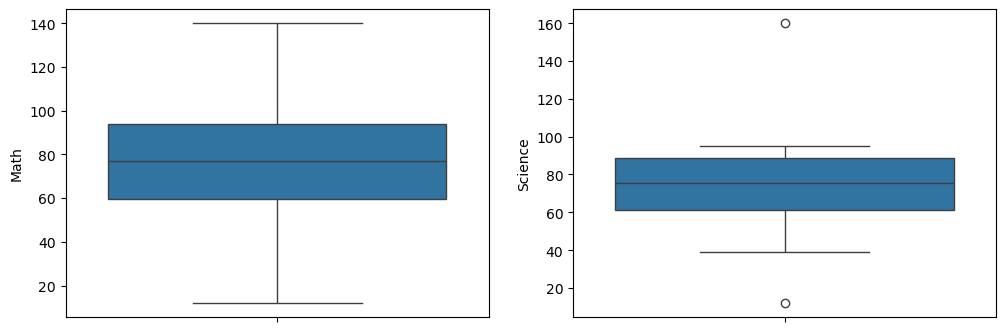

In [146]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))
sns.boxplot( df['Math'], ax=ax1)
sns.boxplot(df['Science'],ax=ax2)

In [148]:
Q1 = df['Science'].quantile(0.25)
Q3 = df['Science'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [150]:
lower

20.0

In [152]:
upper

130.0

In [166]:
mask=(df['Science']<=lower) | (df['Science']>=upper)

In [168]:
mask

0     False
1     False
2     False
3     False
4      True
5     False
6     False
7     False
8     False
9     False
10     True
11    False
Name: Science, dtype: bool

In [174]:
df['Science']=np.where(df['Science']>upper, upper, np.where(df['Science']<lower, lower, df['Science']))

In [176]:
df

,studID,Math,Science,Attendance_Rate
0,1,88.000000,76.000000,0.95
1,2,92.000000,85.000000,0.76
2,3,12.000000,91.000000,0.87
3,4,77.363636,44.000000,0.91
4,5,45.000000,130.000000,0.65
5,6,60.000000,39.000000,0.50
6,7,74.000000,72.000000,0.89
7,8,99.000000,95.000000,0.97
8,9,105.000000,88.000000,1.00
9,10,77.000000,75.363636,0.98


In [178]:
## np.where(cond, true, false)

<Axes: xlabel='Science', ylabel='Density'>

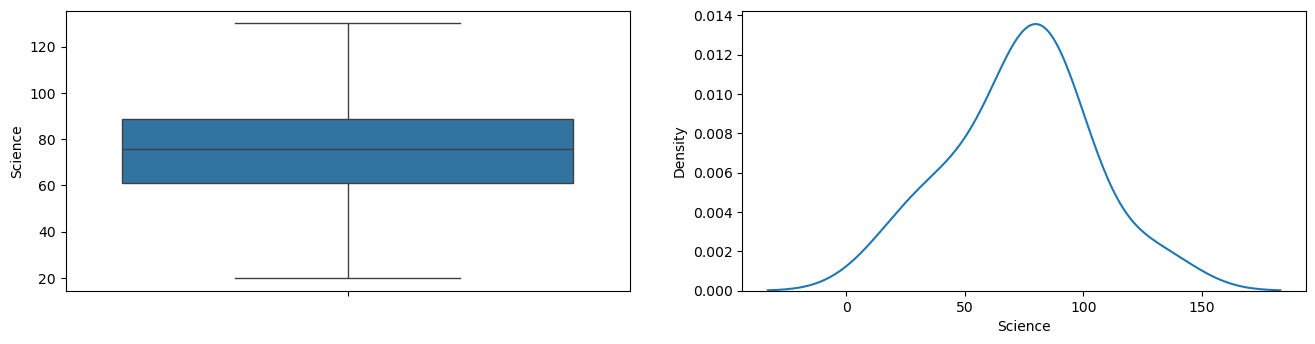

In [192]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(df['Science'])

plt.subplot(2,2,2)
sns.kdeplot(df['Science'])



## 3. Chnage skewness


Skewness before transformation: -1.5037439566135162
Skewness after transformation: -0.5513593594636498


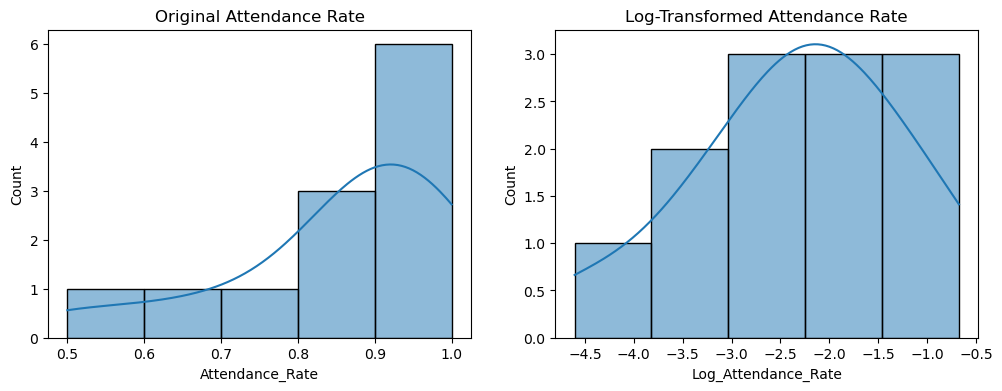

In [197]:

# Check original skewness
print("\nSkewness before transformation:", df['Attendance_Rate'].skew())

# Apply log transformation (after adding a small constant to avoid log(0))
df['Log_Attendance_Rate'] = np.log(1.01-df['Attendance_Rate'] )

# Check skewness again
print("Skewness after transformation:", df['Log_Attendance_Rate'].skew())

# Plot original and transformed
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['Attendance_Rate'], ax=axes[0], kde=True)
axes[0].set_title("Original Attendance Rate")
sns.histplot(df['Log_Attendance_Rate'], ax=axes[1], kde=True)
axes[1].set_title("Log-Transformed Attendance Rate")
plt.show()
